In [7]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Step 2: Load the Dataset
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [11]:
# Step 3: Inspect the Data
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [12]:
# Preview data
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [13]:
# Check for missing values
print("Missing values in Customers:", customers.isnull().sum())
print("Missing values in Products:", products.isnull().sum())
print("Missing values in Transactions:", transactions.isnull().sum())

Missing values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [14]:
# Step 4: Merge the DataFrames
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [15]:
# Convert dates to datetime
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

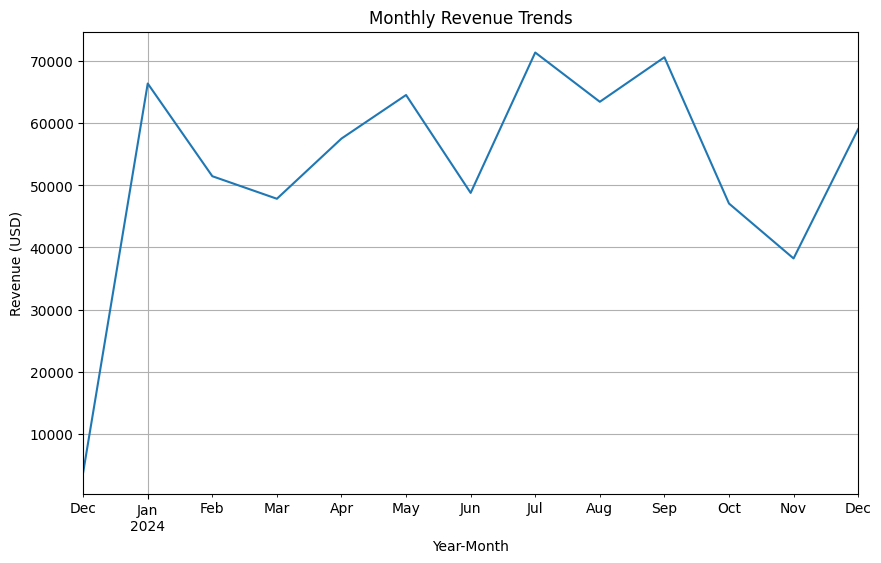

In [16]:
# Step 5: Perform EDA

## 5.1 Revenue Trends Over Time
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')
revenue_trends = merged_df.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
revenue_trends.plot(kind='line', title='Monthly Revenue Trends')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year-Month')
plt.grid()
plt.show()

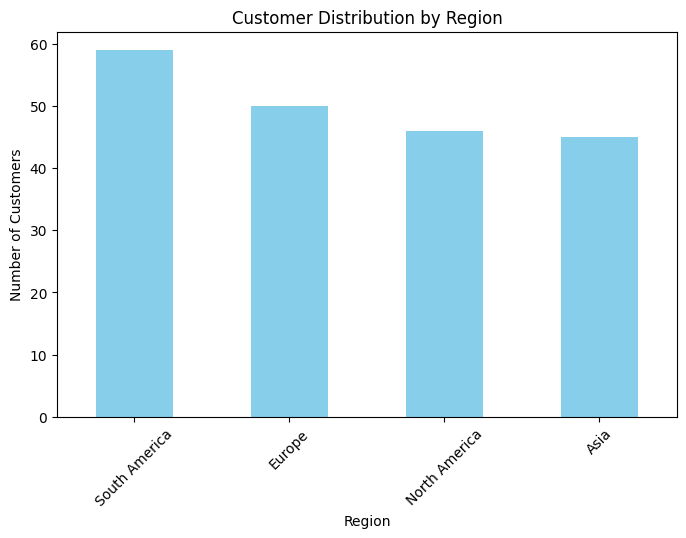

In [17]:
## 5.2 Regional Customer Distribution
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

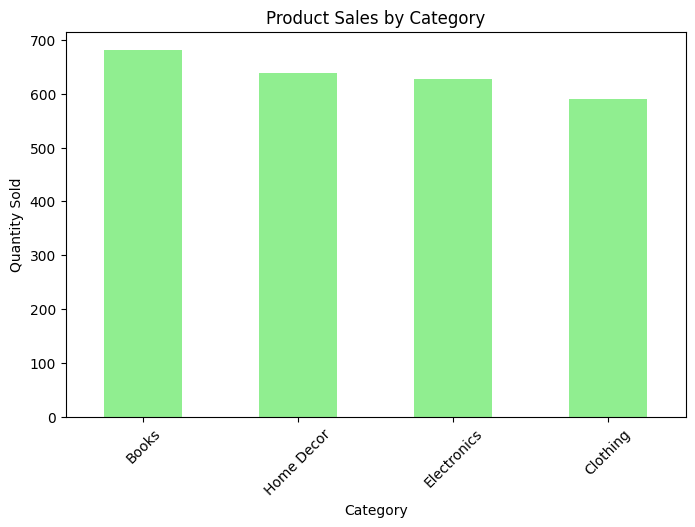

In [18]:
## 5.3 Product Popularity by Category
category_sales = merged_df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', title='Product Sales by Category', color='lightgreen')
plt.ylabel('Quantity Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

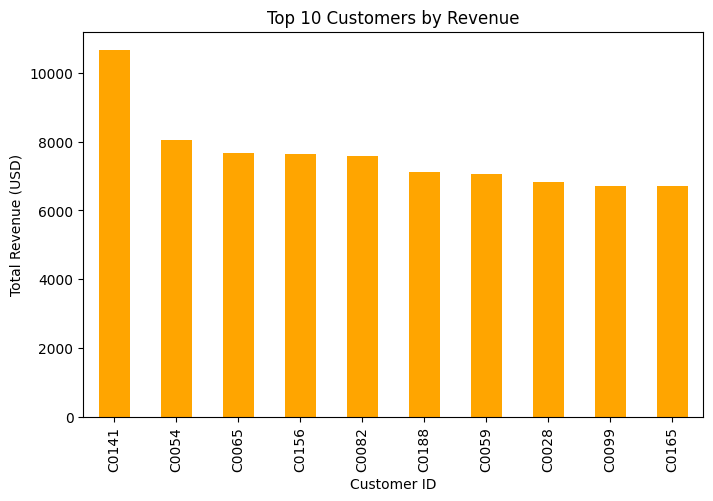

In [19]:
## 5.4 Top Customers by Revenue
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(8, 5))
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', color='orange')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Customer ID')
plt.show()

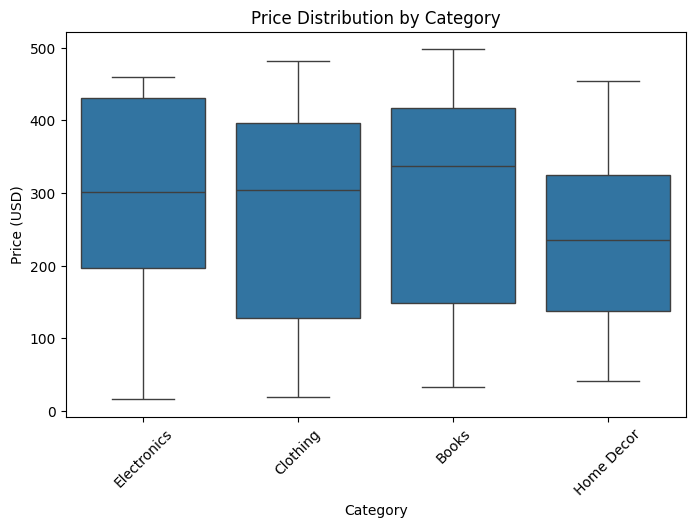

In [24]:
## 5.5 Price Sensitivity Analysis
# Ensure the column name is correct
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='Category', y='Price_x')  # Use 'Price_y' if needed
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.ylabel('Price (USD)')
plt.xlabel('Category')
plt.show()

In [1]:
# Step 6: Save the updated insights to a file
insights = """
Business Insights:
1. Revenue shows a peak during holiday months (December and January), suggesting promotional opportunities to capitalize on seasonal demand.
2. Electronics and Books are the leading categories in terms of sales, while Home Decor shows potential for growth with better marketing strategies.
3. South America has the highest number of customers, while North America generates higher revenue per customer, highlighting the importance of targeted regional strategies.
4. The majority of products fall within mid-range pricing ($125-$375), indicating this is the sweet spot for customer affordability and demand.
5. A small group of repeat customers (Top 10) contributes significantly to revenue, emphasizing the need to focus on loyalty programs.
"""
with open('Business_Insights.txt', 'w') as file:
    file.write(insights)